<a href="https://colab.research.google.com/github/Swetha-ai-dotcom/Apple-count/blob/main/Apple_count.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from google.colab import drive
drive.mount('/content/drive')  # Use a simple path without spaces

# After mounting, access the file with its full path in Google Drive
video_path = "/content/drive/MyDrive/Colab Notebooks/Machine Learning/Apple orchard/vid3.mp4"


Mounted at /content/drive


In [2]:
# Use YOLOv5 pre-trained model
model_weights = "yolov5s.pt"  # Replace with your custom-trained weights if available


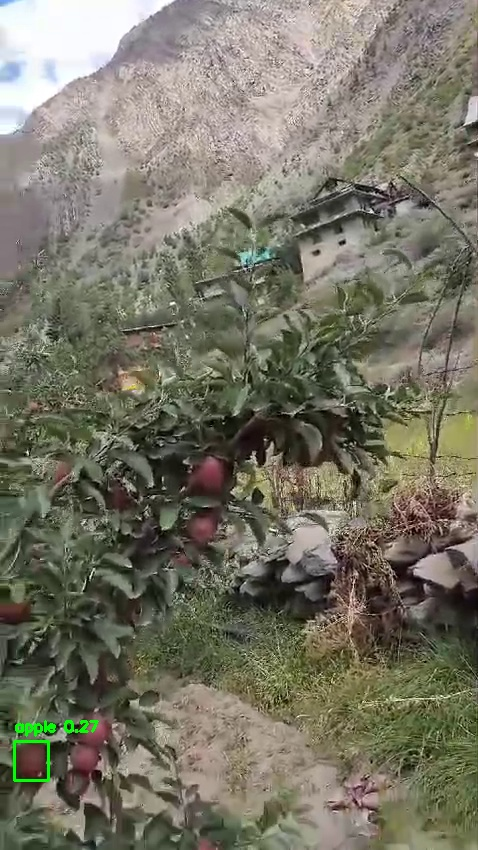

Processing frame 151...


/root/.cache/torch/hub/ultralytics_yolov5_master/models/common.py:892: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with amp.autocast(autocast):


Processing frame 152...


/root/.cache/torch/hub/ultralytics_yolov5_master/models/common.py:892: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with amp.autocast(autocast):


Processing frame 153...


/root/.cache/torch/hub/ultralytics_yolov5_master/models/common.py:892: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with amp.autocast(autocast):


Processing frame 154...


/root/.cache/torch/hub/ultralytics_yolov5_master/models/common.py:892: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with amp.autocast(autocast):


Processing frame 155...


/root/.cache/torch/hub/ultralytics_yolov5_master/models/common.py:892: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with amp.autocast(autocast):


Processing frame 156...


/root/.cache/torch/hub/ultralytics_yolov5_master/models/common.py:892: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with amp.autocast(autocast):


Processing frame 157...


/root/.cache/torch/hub/ultralytics_yolov5_master/models/common.py:892: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with amp.autocast(autocast):


Total apples detected in the video: 1294


In [3]:
import torch
import cv2
from IPython.display import display, Image, clear_output

# Load YOLOv5 model
model = torch.hub.load('ultralytics/yolov5', 'custom', path=model_weights)

# Load video
video = cv2.VideoCapture(video_path)

# Check if the video loaded successfully
if not video.isOpened():
    print("Error: Could not open video.")
else:
    print("Video loaded successfully.")

# Output video path
output_video_path = "apple_detection_output.mp4"

# Get video properties
frame_width = int(video.get(cv2.CAP_PROP_FRAME_WIDTH))
frame_height = int(video.get(cv2.CAP_PROP_FRAME_HEIGHT))
fps = int(video.get(cv2.CAP_PROP_FPS))

# Create a VideoWriter object to save the output
fourcc = cv2.VideoWriter_fourcc(*'mp4v')  # Codec
out = cv2.VideoWriter(output_video_path, fourcc, fps, (frame_width, frame_height))

# Count apples frame by frame
total_apples = 0
frame_count = 0

while True:
    ret, frame = video.read()

    if not ret:
        break

    frame_count += 1
    print(f"Processing frame {frame_count}...")

    # Convert BGR to RGB
    rgb_frame = cv2.cvtColor(frame, cv2.COLOR_BGR2RGB)

    # Perform detection
    results = model(rgb_frame)

    # Get detection data
    detections = results.pandas().xyxy[0]

    # Filter detections to count only apples (adjust class ID/name for apples)
    apple_detections = detections[detections['name'] == 'apple']  # Ensure "apple" matches your model classes
    apple_count = len(apple_detections)

    # Draw detections on the frame
    for _, row in apple_detections.iterrows():
        # Bounding box
        x1, y1, x2, y2 = int(row['xmin']), int(row['ymin']), int(row['xmax']), int(row['ymax'])
        cv2.rectangle(frame, (x1, y1), (x2, y2), (0, 255, 0), 2)

        # Label
        label = f"{row['name']} {row['confidence']:.2f}"
        cv2.putText(frame, label, (x1, y1 - 10), cv2.FONT_HERSHEY_SIMPLEX, 0.5, (0, 255, 0), 2)

    # Update total apple count
    total_apples += apple_count

    # Write the frame to the output video
    out.write(frame)

    # Display the frame in Colab
    if frame_count % 10 == 0:  # Display every 10th frame
        clear_output(wait=True)
        _, frame_buffer = cv2.imencode('.jpg', frame)
        display(Image(data=frame_buffer))

# Release resources
video.release()
out.release()

print(f"Total apples detected in the video: {total_apples}")


In [4]:
from google.colab import files
files.download(output_video_path)


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>